In [1]:
import pandas as pd

df = pd.read_csv('../data/bbc-text.csv')

df = df[["category", "text"]]
df.columns = ["label", "text"]
print(df.head())
print("Categories:", df["label"].unique())



           label                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...
Categories: ['tech' 'business' 'sport' 'entertainment' 'politics']


In [2]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df['text'] = df['text'].apply(clean_text)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib


X = df["text"]
y= df["label"]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


models ={
    "Logisitic Regression":LogisticRegression(max_iter = 1000),
    "SVM":SVC(probability=True),
    "Random Forest":RandomForestClassifier()
}

trained_models= {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    trained_models[name] = model

    joblib.dump(model, f'../models/{name.replace(" ","_").lower()}.pkl')


print("All models trained and saved successfully")


All models trained and saved successfully


In [4]:
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [6]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
U

### Extracting reports

=== Logisitic Regression ===
Accuracy: 0.9730337078651685
               precision    recall  f1-score   support

     business       0.97      0.94      0.95       101
entertainment       1.00      0.96      0.98        81
     politics       0.93      0.98      0.95        83
        sport       0.98      1.00      0.99        98
         tech       0.99      0.99      0.99        82

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



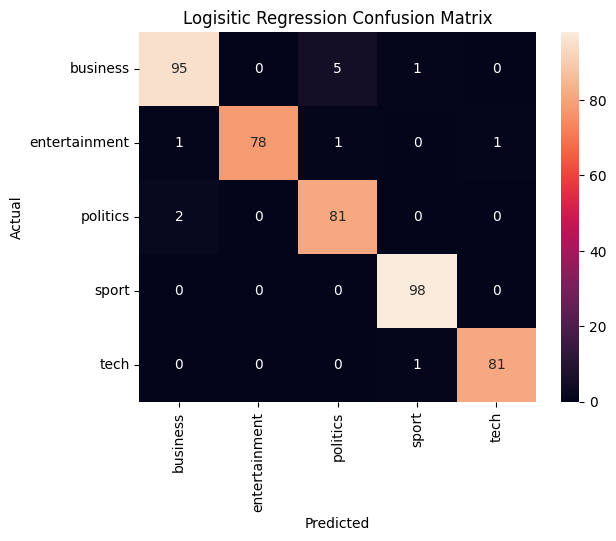

=== SVM ===
Accuracy: 0.9752808988764045
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       101
entertainment       1.00      0.99      0.99        81
     politics       0.94      0.98      0.96        83
        sport       0.98      1.00      0.99        98
         tech       1.00      0.98      0.99        82

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



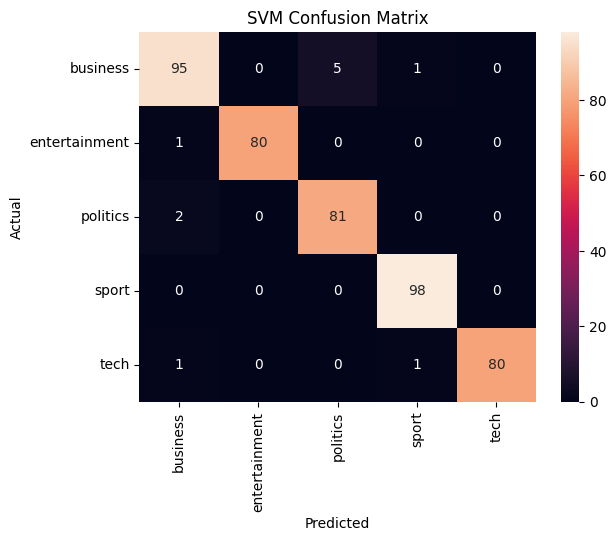

=== Random Forest ===
Accuracy: 0.9415730337078652
               precision    recall  f1-score   support

     business       0.90      0.91      0.91       101
entertainment       0.99      0.89      0.94        81
     politics       0.92      0.96      0.94        83
        sport       0.97      0.99      0.98        98
         tech       0.94      0.95      0.95        82

     accuracy                           0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



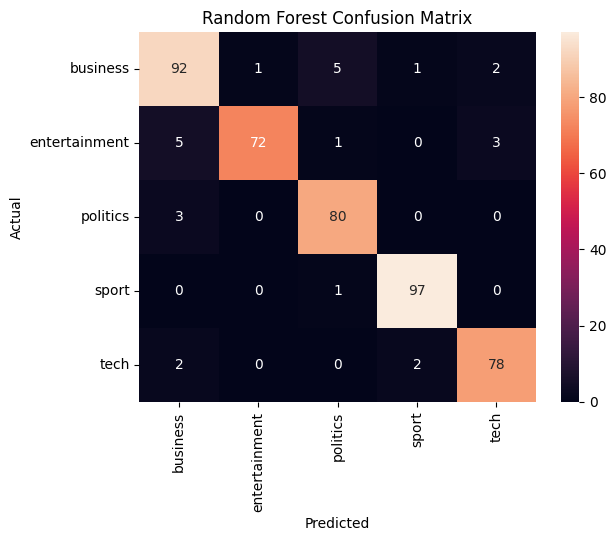

In [10]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cats = sorted(df['label'].unique())
for name,model in trained_models.items():
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)

    print(f"=== {name} ===")
    print("Accuracy:",acc)

    print(classification_report(y_test,y_pred))

    cm = confusion_matrix(y_test, y_pred, labels =cats)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels = cats, yticklabels= cats)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
